In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import math

data = pd.read_csv('data/data.csv')
data = data.drop(columns=['Latitude', 'Longitude', 'Urban Population', 'Total Population', 'Mortality Rate', 'Mean temperature', 'Climate'])

### Clipping the time series
From the previous plots, we can see that the cumulative time series of confirmed cases is not always well suited for linear or exponential regression : some countries have curves that alternate between growth and stagnation phases.

The reason for this is probably that a lot of countries have implemented measures to slow down the spread of the COVID-19 and this means that the natural spread rate that we are trying to capture is not visible in every part of the time series.

To solve this problem, we can clip the time series to only keep the part where the derivative of the time series is the highest.

#### Plotting the second derivative of the confirmed cases

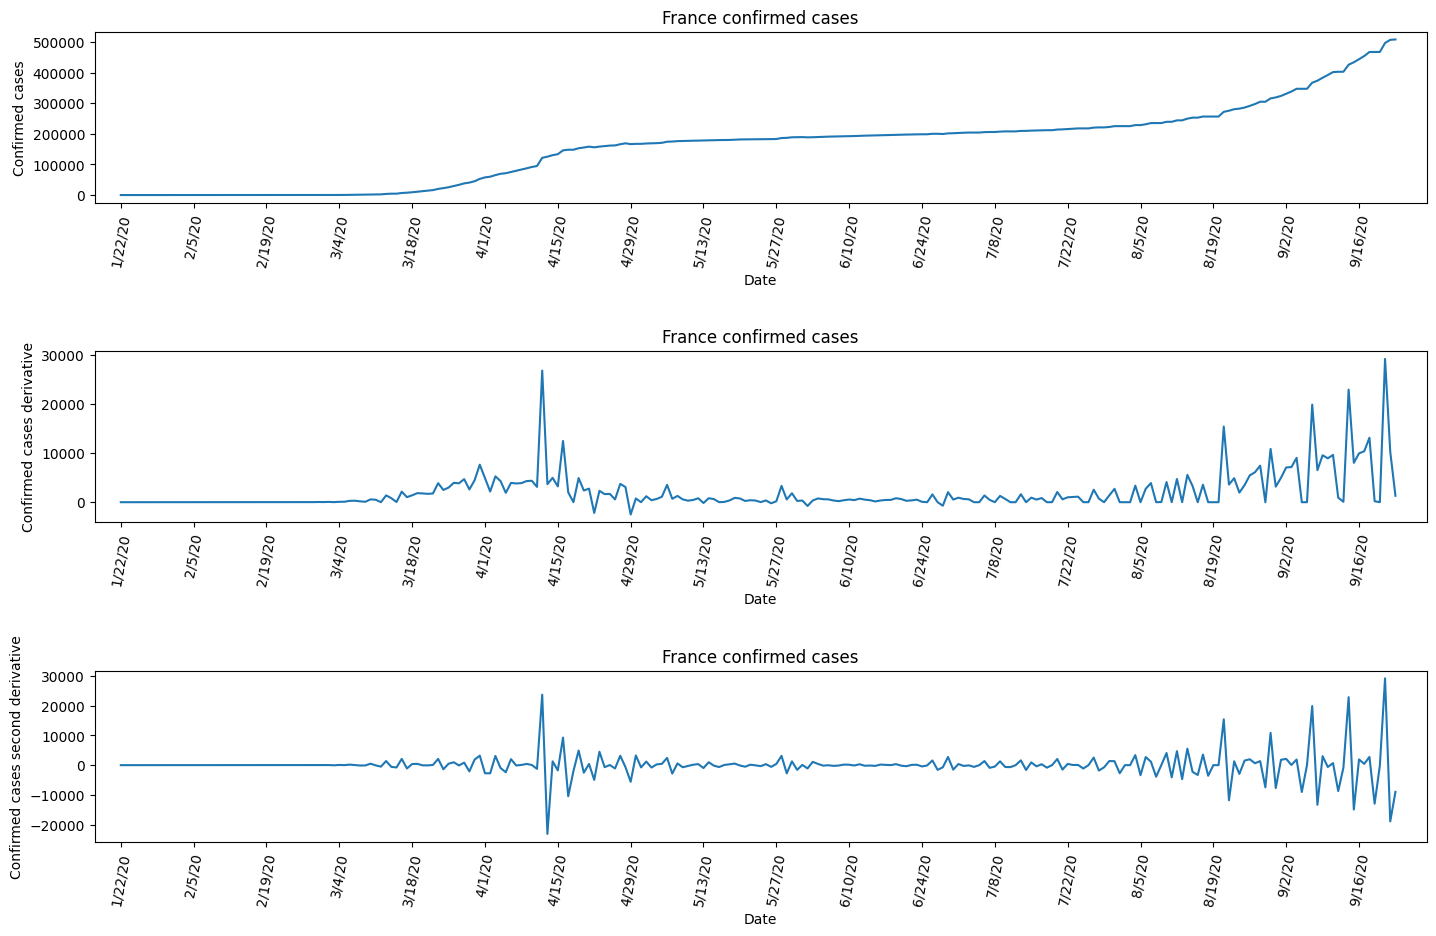

In [98]:
country = 'France'

fig, axs = plt.subplots(3, 1, figsize=(15, 10))

country_data = data[data['Country'] == country]
country_data = country_data.drop(columns=['Country'])

x = country_data.columns
y = country_data.values[0]

d1 = [y[i] - y[i-1] if i > 0 else 0 for i in range(len(y))]
d2 = [d1[i] - d1[i-1] if i > 0 else 0 for i in range(len(d1))]

for i, d in enumerate([y, d1, d2]):
    axs[i].plot(x, d)
    axs[i].set_title(f'{country} confirmed cases')
    axs[i].set_xlim(-5, len(x) + 5)
    axs[i].set_xlabel('Date')
    axs[i].tick_params(axis='x', rotation=80)
    axs[i].xaxis.set_major_locator(plt.MultipleLocator(14))

axs[0].set_ylabel('Confirmed cases')
axs[1].set_ylabel('Confirmed cases derivative')
axs[2].set_ylabel('Confirmed cases second derivative')
fig.tight_layout(pad=3.0)
plt.show()